In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
original_train_df = pd.read_csv('data/xauusd/1m/dynamic_labeled_train.csv')
original_val_df = pd.read_csv('data/xauusd/1m/dynamic_labeled_dev.csv')
original_test_df = pd.read_csv('data/xauusd/1m/dynamic_labeled_test.csv')

train_acc_per_batch_df = pd.read_csv('tested/train_acc_per_batch.csv')
val_acc_per_batch_df = pd.read_csv('tested/val_acc_per_batch.csv')
test_acc_per_batch_df = pd.read_csv('tested/test_acc_per_batch.csv')

train_predictions_df = pd.read_csv('tested/train_predictions.csv')
val_predictions_df = pd.read_csv('tested/val_predictions.csv')
test_predictions_df = pd.read_csv('tested/test_predictions.csv')

In [3]:
train_acc_per_batch_df.describe()

,BUY ACCURACY,SELL ACCURACY,HOLD ACCURACY,OVERALL ACCURACY
count,13463.000000,13463.000000,13463.000000,13463.000000
mean,0.815204,0.860380,0.743786,0.709685
std,0.024271,0.021570,0.027197,0.028310
min,0.718750,0.777344,0.636719,0.601562
25%,0.800781,0.847656,0.726562,0.691406
50%,0.816406,0.859375,0.742188,0.710938
75%,0.832031,0.875000,0.761719,0.730469
max,0.898438,0.945312,0.847656,0.812500


In [4]:
val_acc_per_batch_df.describe()

,BUY ACCURACY,SELL ACCURACY,HOLD ACCURACY,OVERALL ACCURACY
count,686.000000,686.000000,686.000000,686.000000
mean,0.785905,0.844192,0.706635,0.668366
std,0.065742,0.045001,0.050648,0.059820
min,0.558594,0.679688,0.541016,0.478516
25%,0.742676,0.818359,0.673828,0.628906
50%,0.789062,0.845703,0.706055,0.667969
75%,0.832031,0.875000,0.740234,0.708984
max,0.982422,0.955078,0.875000,0.841797


In [5]:
test_acc_per_batch_df.describe()

,BUY ACCURACY,SELL ACCURACY,HOLD ACCURACY,OVERALL ACCURACY
count,2202.000000,2202.000000,2202.000000,2202.000000
mean,0.773402,0.843439,0.700594,0.658717
std,0.070445,0.044791,0.054778,0.062955
min,0.509766,0.642578,0.486328,0.437500
25%,0.726562,0.814453,0.667969,0.617188
50%,0.773438,0.845703,0.701172,0.658203
75%,0.822266,0.875000,0.736328,0.699219
max,0.990234,0.978516,0.869141,0.863281


In [18]:
def prepare(df):
    df = df.copy()
    df['CORRECT'] = (df['GROUNDTRUTH'] == df['PREDICTION']).astype(int)
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    
    print("Number of NaN:", df.isnull().sum().sum())
    
    return df


train_predictions_df = prepare(train_predictions_df)
val_predictions_df = prepare(val_predictions_df)
test_predictions_df = prepare(test_predictions_df)

Number of NaN: 0
Number of NaN: 0
Number of NaN: 0


Percentage that probs > 0.7 is 51.71%
Overall accuracy on this threshold is 84.74%
Confusion matrix:
         BUY    SELL    HOLD
BUY   474682   22115   82340
SELL    3508  264095   69574
HOLD   66612   27830  771364
Classification Report:
              precision    recall  f1-score   support

         BUY     0.8713    0.8196    0.8447    579137
        SELL     0.8410    0.7833    0.8111    337177
        HOLD     0.8355    0.8909    0.8623    865806

    accuracy                         0.8474   1782120
   macro avg     0.8492    0.8313    0.8394   1782120
weighted avg     0.8481    0.8474    0.8469   1782120



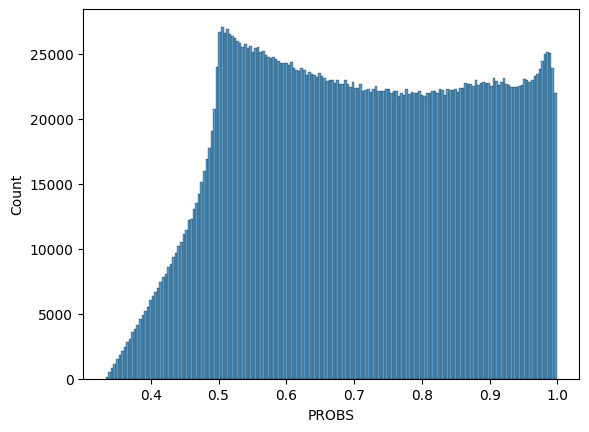

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

def stat_by_probs(df, probs=0.5):
    df_l = df.loc[df['PROBS'] > probs]
    print(f'Percentage that probs > {probs} is {len(df_l) / len(df) * 100:.2f}%')
    print(f'Overall accuracy on this threshold is {len(df_l.loc[df_l['CORRECT'] == 1]) / len(df_l) * 100:.2f}%')
    target_names = ['BUY', 'SELL', 'HOLD']
    cm = confusion_matrix(df_l['GROUNDTRUTH'].values, df_l['PREDICTION'].values)
    print('Confusion matrix:')
    print(pd.DataFrame(cm, columns=target_names, index=target_names))
    print("Classification Report:")
    print(classification_report(df_l['GROUNDTRUTH'].values, df_l['PREDICTION'].values, target_names=target_names, digits=4, zero_division=0))
    
    sns.histplot(df['PROBS'])
    
    
stat_by_probs(train_predictions_df, probs=0.7)

Percentage that probs > 0.7 is 47.85%
Overall accuracy on this threshold is 80.64%
Confusion matrix:
        BUY   SELL   HOLD
BUY   48762   2335   9276
SELL    402  26581   7045
HOLD   9442   4000  60049
Classification Report:
              precision    recall  f1-score   support

         BUY     0.8320    0.8077    0.8197     60373
        SELL     0.8075    0.7812    0.7941     34028
        HOLD     0.7863    0.8171    0.8014     73491

    accuracy                         0.8064    167892
   macro avg     0.8086    0.8020    0.8051    167892
weighted avg     0.8070    0.8064    0.8065    167892



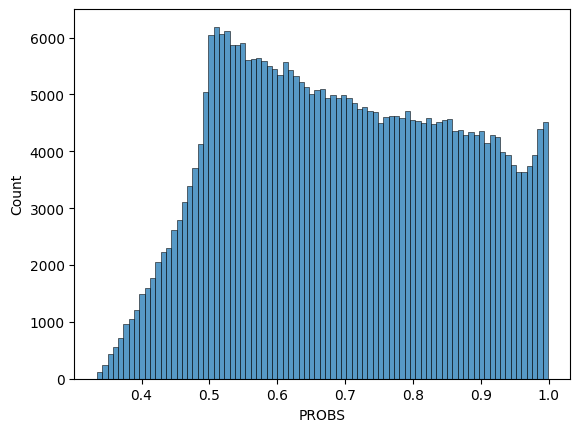

In [20]:
stat_by_probs(val_predictions_df, probs=0.7)

Percentage that probs > 0.7 is 46.50%
Overall accuracy on this threshold is 79.68%
Confusion matrix:
         BUY   SELL    HOLD
BUY   168336   7074   25161
SELL    2035  84294   19082
HOLD   39453  13683  165033
Classification Report:
              precision    recall  f1-score   support

         BUY     0.8023    0.8393    0.8204    200571
        SELL     0.8024    0.7997    0.8010    105411
        HOLD     0.7886    0.7564    0.7722    218169

    accuracy                         0.7968    524151
   macro avg     0.7978    0.7985    0.7979    524151
weighted avg     0.7966    0.7968    0.7964    524151



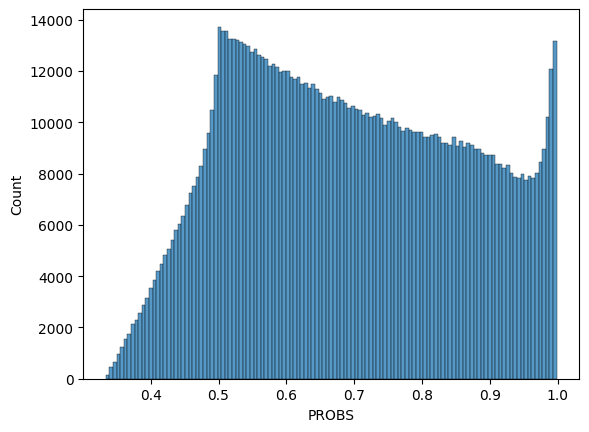

In [21]:
stat_by_probs(test_predictions_df, probs=0.7)


In [24]:
def show_probs(df, start_time=None, end_time=None):
    if start_time and end_time:
        start_dt = pd.to_datetime(start_time)
        end_dt = pd.to_datetime(end_time)
        df = df.loc[(df['DATETIME'] >= start_dt) & (df['DATETIME'] <= end_dt)]

    # # Lấy mẫu nếu quá lớn
    # max_points = 500
    # if len(df) > max_points:
    #     df = df.iloc[::len(df) // max_points]

    colors = df['CORRECT'].map({1: 'yellow', 0: 'red'}).values

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(df['DATETIME'], df['PROBS'], color=colors, width=0.0005)

    # Định dạng trục x: chỉ hiển thị một số mốc thời gian
    n_labels = 10
    xticks = np.linspace(0, len(df) - 1, n_labels, dtype=int)
    ax.set_xticks(df['DATETIME'].iloc[xticks])
    ax.set_xticklabels(df['DATETIME'].dt.strftime('%Y-%m-%d %H:%M').iloc[xticks], rotation=45, ha='right')

    ax.set_xlabel('Datetime')
    ax.set_ylabel('Probability')
    ax.set_title('Bar Chart of PROBS based on CORRECT')
    legend_handles = [
        plt.Line2D([0], [0], color='yellow', lw=6, label='Correct'),
        plt.Line2D([0], [0], color='red', lw=6, label='Incorrect')
    ]
    ax.legend(handles=legend_handles, title='Correct', loc='upper right')
    plt.tight_layout()
    plt.show()

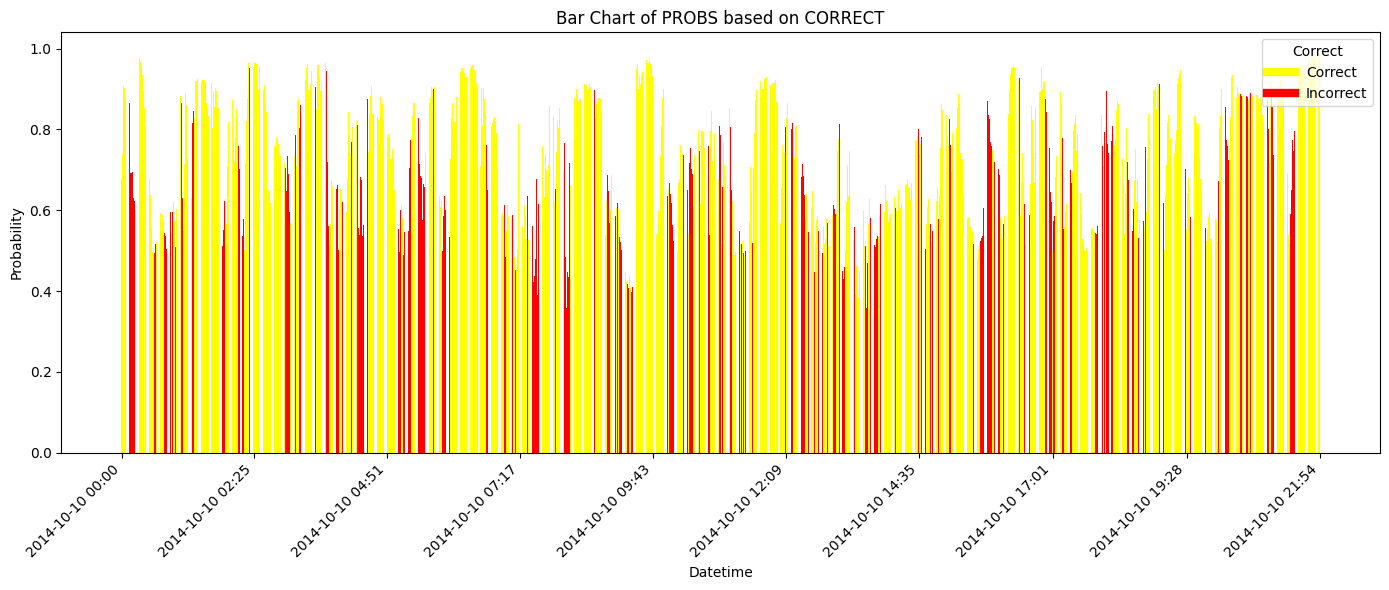

In [25]:
start_time = '2014-10-10'
end_time = '2014-10-11'
show_probs(train_predictions_df, start_time, end_time)

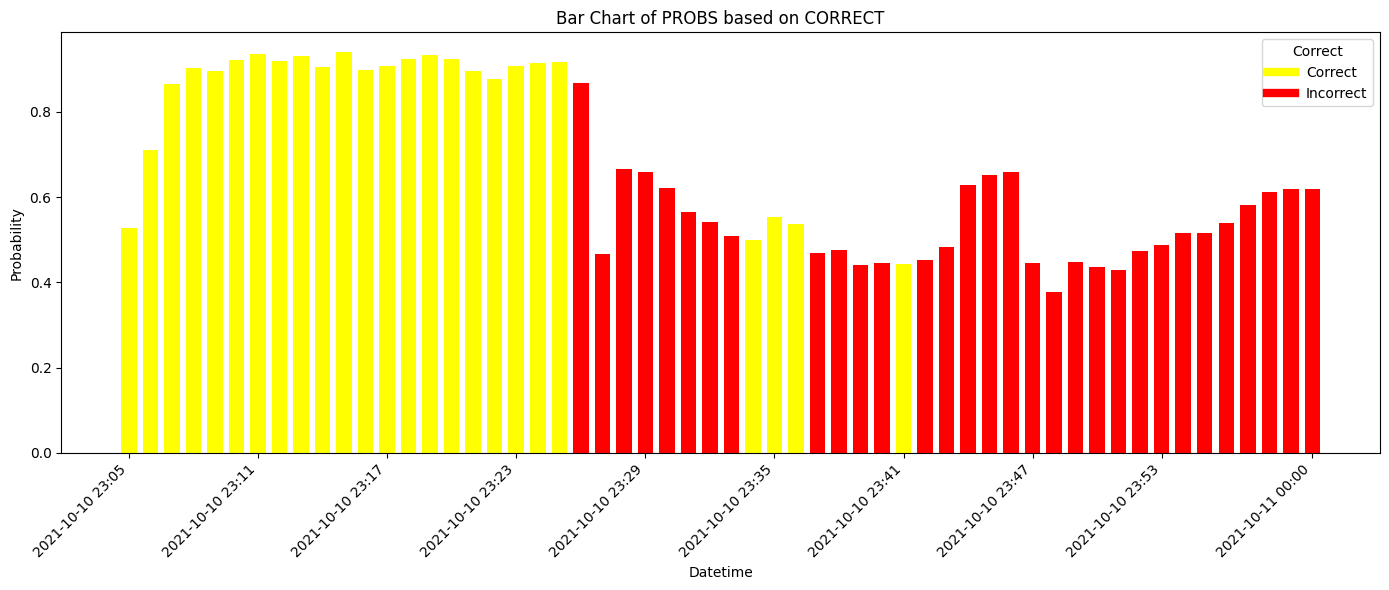

In [26]:
start_time = '2021-10-10'
end_time = '2021-10-11'
show_probs(val_predictions_df, start_time, end_time)

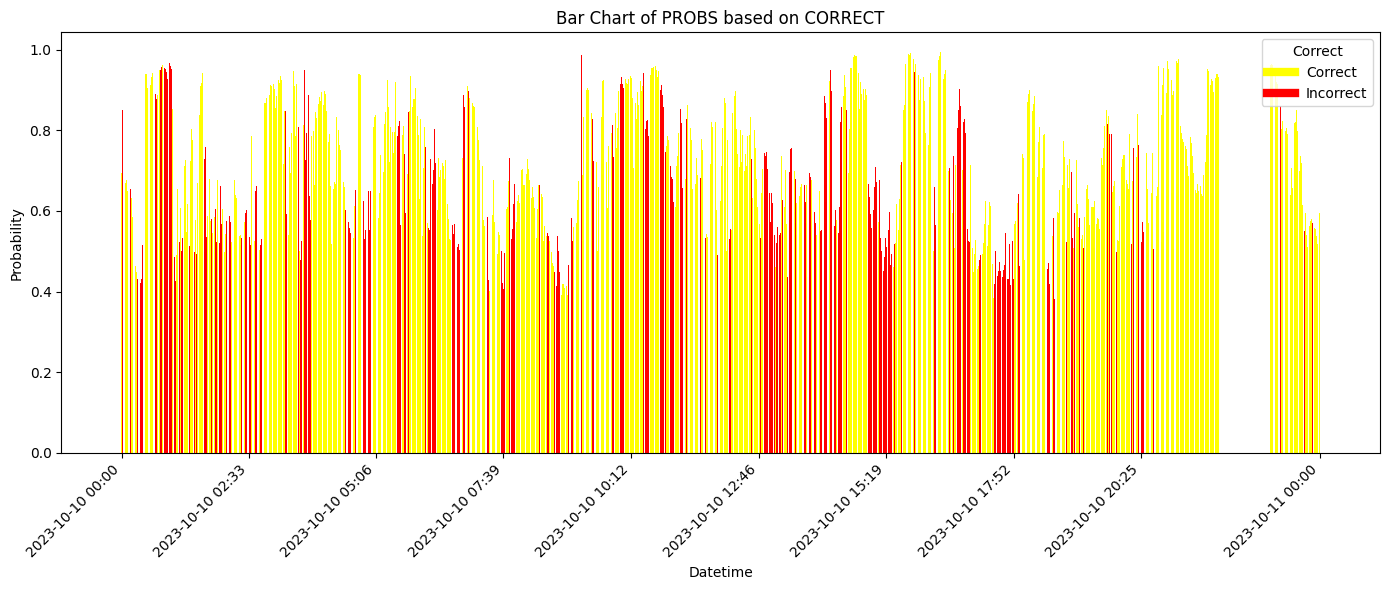

In [27]:
start_time = '2023-10-10'
end_time = '2023-10-11'
show_probs(test_predictions_df, start_time, end_time)

In [28]:
# show_probs(val_predictions_df)

In [29]:
# show_probs(test_predictions_df)


In [59]:
def evaluate_by_period(predictions_df, period='W'):
    """
    Đánh giá kết quả theo giai đoạn (tuần, tháng) dựa trên predictions_df.
    Thêm accuracy cho từng action (BUY, SELL, HOLD).
    period: 'W' cho tuần, 'M' cho tháng.
    """
    df = predictions_df.copy()
    df = df.dropna(subset=['DATETIME', 'CORRECT', 'GROUNDTRUTH', 'PREDICTION'])
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    df['period'] = df['DATETIME'].dt.to_period(period).dt.to_timestamp()

    def action_acc(action):
        return lambda x: ((x['GROUNDTRUTH'] == action) & (x['PREDICTION'] == action)).sum() / max((x['GROUNDTRUTH'] == action).sum(), 1)

    grouped = df.groupby('period').apply(
        lambda x: pd.Series({
            'total': len(x),
            'correct': x['CORRECT'].sum(),
            'accuracy': x['CORRECT'].mean(),
            'buy_ratio': (x['PREDICTION'] == 0).mean(),
            'sell_ratio': (x['PREDICTION'] == 1).mean(),
            'hold_ratio': (x['PREDICTION'] == 2).mean(),
            'buy_acc': action_acc(0)(x),
            'sell_acc': action_acc(1)(x),
            'hold_acc': action_acc(2)(x),
        }), include_groups=False
    ).reset_index()

    print(grouped)
    # Vẽ biểu đồ accuracy tổng và từng action theo thời gian với màu yêu cầu
    plt.figure(figsize=(12,5))
    # plt.plot(grouped['period'], grouped['accuracy'], marker='o', color='black', label='Overall Accuracy')
    plt.plot(grouped['period'], grouped['buy_acc'], marker='o', color='green', label='BUY Accuracy')
    # plt.plot(grouped['period'], grouped['sell_acc'], marker='o', color='red', label='SELL Accuracy')
    # plt.plot(grouped['period'], grouped['hold_acc'], marker='o', color='blue', label='HOLD Accuracy')
    plt.xlabel('Period')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy theo từng {"tuần" if period=="W" else "tháng"}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    # return grouped

WEEK
        period   total  correct  accuracy  buy_ratio  sell_ratio  hold_ratio  \
0   2011-01-10   698.0    472.0  0.676218   0.753582    0.161891    0.084527   
1   2011-01-17  6368.0   4377.0  0.687343   0.361338    0.243247    0.395415   
2   2011-01-24  6560.0   4494.0  0.685061   0.420427    0.239939    0.339634   
3   2011-01-31  6565.0   4595.0  0.699924   0.421478    0.245697    0.332826   
4   2011-02-07  6567.0   4680.0  0.712654   0.285519    0.212426    0.502056   
..         ...     ...      ...       ...        ...         ...         ...   
516 2020-11-30  6850.0   4809.0  0.702044   0.370949    0.196204    0.432847   
517 2020-12-07  6850.0   4660.0  0.680292   0.315474    0.204672    0.479854   
518 2020-12-14  6850.0   4636.0  0.676788   0.295766    0.179708    0.524526   
519 2020-12-21  5290.0   3653.0  0.690548   0.338941    0.215123    0.445936   
520 2020-12-28  5263.0   3628.0  0.689341   0.297169    0.178225    0.524606   

      buy_acc  sell_acc  hold_acc 

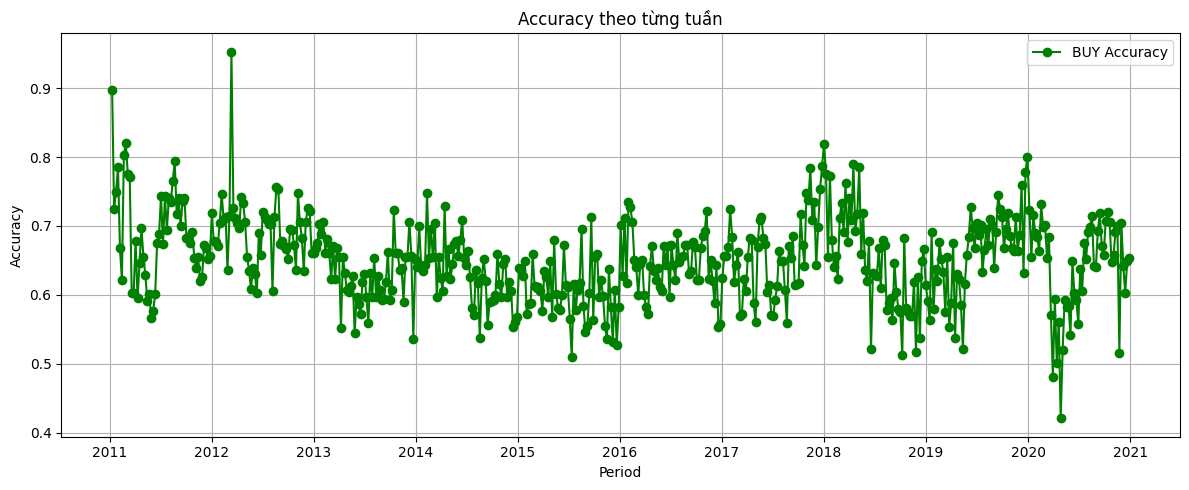

MONTH
        period    total  correct  accuracy  buy_ratio  sell_ratio  hold_ratio  \
0   2011-01-01  14941.0  10247.0  0.685831   0.424537    0.240680    0.334783   
1   2011-02-01  25973.0  18330.0  0.705733   0.339083    0.198167    0.462750   
2   2011-03-01  29366.0  20229.0  0.688858   0.379963    0.198767    0.421269   
3   2011-04-01  21195.0  14594.0  0.688559   0.311205    0.177023    0.511772   
4   2011-05-01  27505.0  18649.0  0.678022   0.303690    0.202290    0.494019   
..         ...      ...      ...       ...        ...         ...         ...   
115 2020-08-01  28828.0  19058.0  0.661093   0.444776    0.224296    0.330928   
116 2020-09-01  29906.0  19918.0  0.666020   0.384104    0.208553    0.407343   
117 2020-10-01  30034.0  20625.0  0.686722   0.330392    0.213025    0.456583   
118 2020-11-01  28339.0  19266.0  0.679841   0.318572    0.213910    0.467518   
119 2020-12-01  29733.0  20475.0  0.688629   0.323950    0.190327    0.485723   

      buy_acc  sell_a

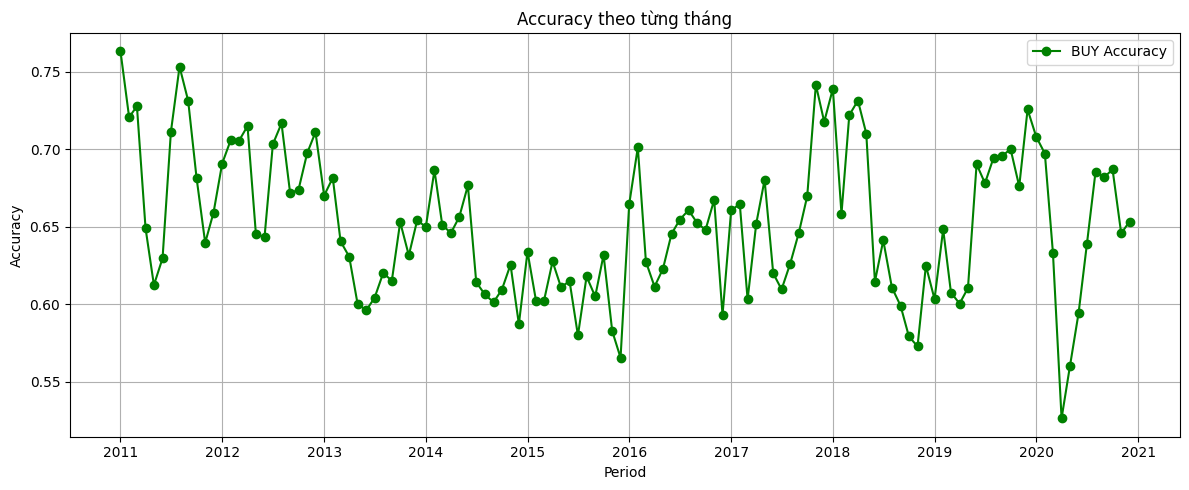

In [60]:
# Đánh giá theo tuan 
print('========================================================')
print('WEEK')
evaluate_by_period(train_predictions_df, period='W')
# Đánh giá theo tháng 
print('========================================================')
print('MONTH')
evaluate_by_period(train_predictions_df, period='M')

WEEK
       period   total  correct  accuracy  buy_ratio  sell_ratio  hold_ratio  \
0  2021-01-04  6723.0   4246.0  0.631563   0.393426    0.179682    0.426893   
1  2021-01-11  6849.0   4268.0  0.623157   0.295810    0.205285    0.498905   
2  2021-01-18  6615.0   4374.0  0.661224   0.353893    0.209977    0.436130   
3  2021-01-25  6841.0   4326.0  0.632364   0.326268    0.227306    0.446426   
4  2021-02-01  6849.0   4342.0  0.633961   0.366039    0.224996    0.408965   
5  2021-02-08  6849.0   4561.0  0.665937   0.349832    0.244707    0.405461   
6  2021-02-15  6615.0   4420.0  0.668178   0.375208    0.245351    0.379441   
7  2021-02-22  6849.0   4137.0  0.604030   0.347058    0.213900    0.439042   
8  2021-03-01  6850.0   4170.0  0.608759   0.394307    0.233285    0.372409   
9  2021-03-08  6902.0   4371.0  0.633295   0.367285    0.213996    0.418719   
10 2021-03-15  6848.0   4536.0  0.662383   0.341560    0.195093    0.463347   
11 2021-03-22  6793.0   4491.0  0.661122   0.26

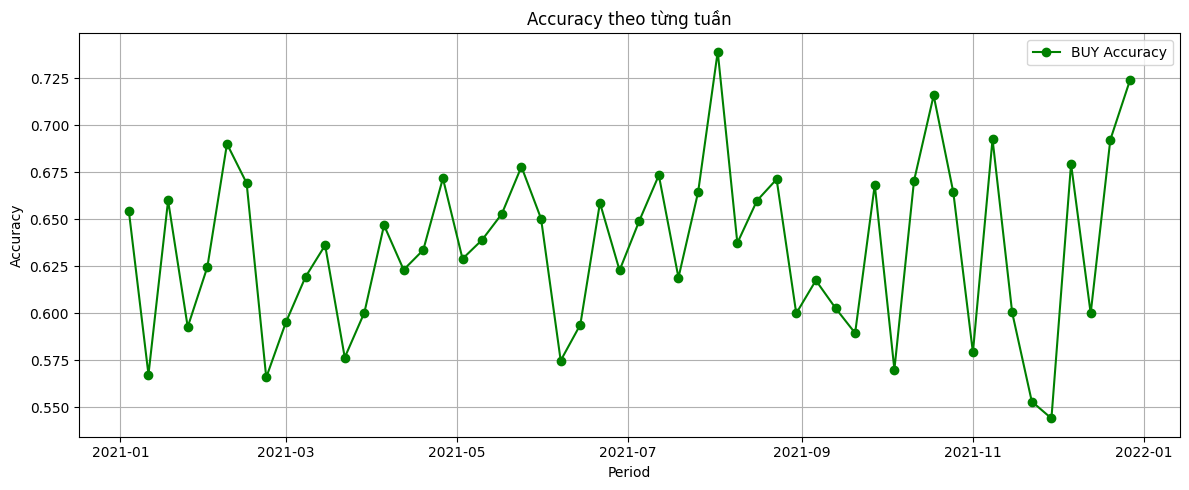

MONTH
       period    total  correct  accuracy  buy_ratio  sell_ratio  hold_ratio  \
0  2021-01-01  27028.0  17214.0  0.636895   0.342016    0.205639    0.452346   
1  2021-02-01  27162.0  17460.0  0.642810   0.359399    0.232126    0.408475   
2  2021-03-01  31557.0  20337.0  0.644453   0.328041    0.215990    0.455969   
3  2021-04-01  28714.0  19476.0  0.678275   0.298983    0.208191    0.492826   
4  2021-05-01  28560.0  19044.0  0.666807   0.317647    0.189461    0.492892   
5  2021-06-01  29748.0  19977.0  0.671541   0.277632    0.210300    0.512068   
6  2021-07-01  29851.0  20467.0  0.685639   0.282168    0.202338    0.515494   
7  2021-08-01  30194.0  20365.0  0.674472   0.293303    0.197490    0.509207   
8  2021-09-01  29699.0  20213.0  0.680595   0.262904    0.207381    0.529715   
9  2021-10-01  28768.0  19718.0  0.685414   0.289558    0.211763    0.498679   
10 2021-11-01  29657.0  19707.0  0.664497   0.279226    0.187443    0.533331   
11 2021-12-01  29918.0  20555.0  0

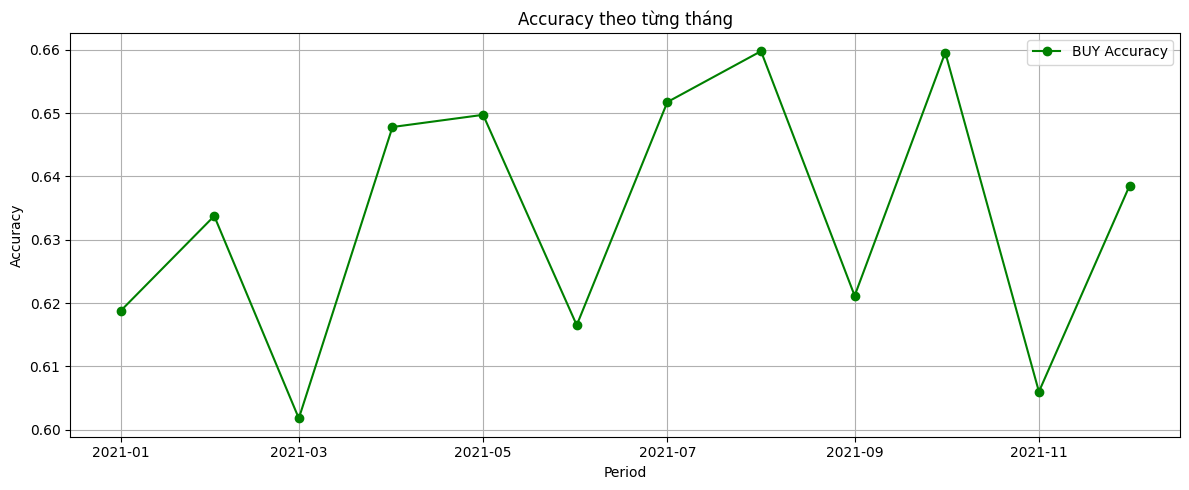

In [63]:
# Đánh giá theo tuan 
print('========================================================')
print('WEEK')
evaluate_by_period(val_predictions_df, period='W')
# Đánh giá theo tháng 
print('========================================================')
print('MONTH')
evaluate_by_period(val_predictions_df, period='M')

WEEK
        period   total  correct  accuracy  buy_ratio  sell_ratio  hold_ratio  \
0   2022-01-03  6722.0   4427.0  0.658584   0.319250    0.238024    0.442725   
1   2022-01-10  6850.0   4814.0  0.702774   0.285401    0.177956    0.536642   
2   2022-01-17  6699.0   4609.0  0.688013   0.284222    0.223466    0.492312   
3   2022-01-24  6850.0   4452.0  0.649927   0.320292    0.213869    0.465839   
4   2022-01-31  6847.0   4788.0  0.699284   0.230320    0.185045    0.584636   
..         ...     ...      ...       ...        ...         ...         ...   
162 2025-02-10  6893.0   4282.0  0.621210   0.533585    0.200058    0.266357   
163 2025-02-17  6739.0   4322.0  0.641341   0.517733    0.196023    0.286244   
164 2025-02-24  6881.0   4272.0  0.620840   0.289493    0.212324    0.498183   
165 2025-03-03  6941.0   4422.0  0.637084   0.283389    0.205302    0.511310   
166 2025-03-10  1783.0   1135.0  0.636568   0.205272    0.232193    0.562535   

      buy_acc  sell_acc  hold_acc 

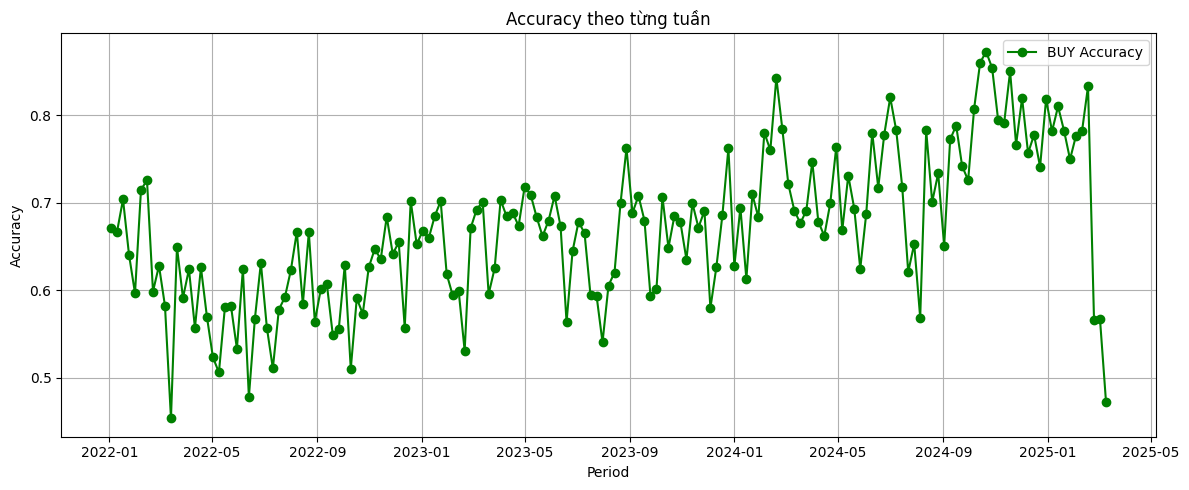

MONTH
       period    total  correct  accuracy  buy_ratio  sell_ratio  hold_ratio  \
0  2022-01-01  28491.0  19170.0  0.672844   0.299007    0.214910    0.486083   
1  2022-02-01  27250.0  18645.0  0.684220   0.320440    0.188037    0.491523   
2  2022-03-01  31533.0  19592.0  0.621317   0.339993    0.209209    0.450798   
3  2022-04-01  27327.0  17464.0  0.639075   0.307096    0.223259    0.469645   
4  2022-05-01  29993.0  19177.0  0.639383   0.265229    0.216384    0.518388   
5  2022-06-01  29964.0  19815.0  0.661294   0.242491    0.216293    0.541216   
6  2022-07-01  28753.0  18855.0  0.655758   0.251000    0.222794    0.526206   
7  2022-08-01  31623.0  21413.0  0.677134   0.270531    0.223287    0.506182   
8  2022-09-01  30056.0  19089.0  0.635114   0.293985    0.235028    0.470987   
9  2022-10-01  28966.0  18704.0  0.645723   0.280743    0.228716    0.490541   
10 2022-11-01  29888.0  19640.0  0.657120   0.328928    0.225776    0.445296   
11 2022-12-01  28916.0  19489.0  0

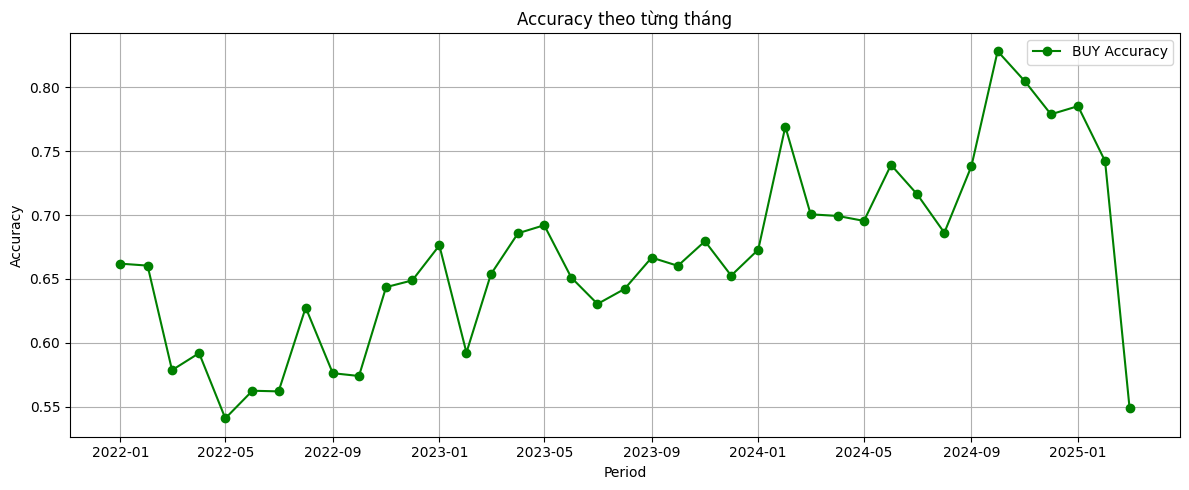

In [65]:
# Đánh giá theo tuan 
print('========================================================')
print('WEEK')
evaluate_by_period(test_predictions_df, period='W')
# Đánh giá theo tháng 
print('========================================================')
print('MONTH')
evaluate_by_period(test_predictions_df, period='M')